# TV Serije

Za svoj projekt sem se odločil za analizo trenutno najbolj popularnih (glede na stran imdb.com) 247 tv serij.
Zbral sem naslednje podatke o omenjenih serijah:
- naslov
- kratek opis
- žanri
- leta izida
- dolžine epizod
- število epizod
- ocena, število glasov
- igralci (in vloge)

In [2]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 14

Za začetek si oglejmo vse podatke, zbrane v tabelah:

In [3]:
serije = pd.read_csv('serije.csv', index_col = 'id')
zanri = pd.read_csv('zanri.csv', index_col = 'id')
drzave = pd.read_csv('drzave.csv', index_col = 'id')
igralci = pd.read_csv('igralci.csv')
leta = pd.read_csv('leta.csv', index_col = 'id')

In [4]:
serije

,naslov,opis,leto,dolzina,epizode,ocena,st_glasov
id,,,,,,,
5491994,Planet Earth II,David Attenborough returns in this breathtakin...,2016–,51,7,9.7,17184
185906,Band of Brothers,The story of Easy Company of the US Army 101st...,2001,54,10,9.5,246659
795176,Planet Earth,"Emmy Award-winning, 11 episodes, 5 years in th...",2006,43,11,9.5,111641
944947,Game of Thrones,Nine noble families fight for control over the...,2011–,56,73,9.5,1106304
903747,Breaking Bad,A high school chemistry teacher diagnosed with...,2008–2013,49,62,9.5,939633
306414,The Wire,"Baltimore drug scene, seen through the eyes of...",2002–2008,59,60,9.4,200345
2395695,Cosmos: A Spacetime Odyssey,A documentary series that explores how we disc...,2014,41,13,9.3,66269
...,...,...,...,...,...,...,...
2249364,Broadchurch,The murder of a young boy in a small coastal t...,2013–,48,24,8.4,46620


In [5]:
zanri

,zanr
id,
5491994,Documentary
185906,Action
185906,Drama
185906,History
185906,War
795176,Documentary
944947,Adventure
...,...
310455,Crime


In [6]:
drzave

,drzava
id,
5491994,UK
185906,USA
185906,UK
795176,UK
944947,USA
944947,UK
903747,USA
...,...
54533,USA


In [7]:
igralci

,id,id igralca,ime,vloga
0,5491994,41003,David Attenborough,Himself - presenter
1,185906,342241,Scott Grimes,Donald G. Malarkey
2,185906,507073,Damian Lewis,Richard D. Winters
3,185906,515296,Ron Livingston,Lewis Nixon
4,185906,853169,Shane Taylor,Eugene G. Roe
5,185906,5531,Donnie Wahlberg,C. Carwood Lipton
6,185906,950186,Peter Youngblood Hills,Darrell C. (Shifty) Powers
...,...,...,...,...
3384,2126154,4813425,Autumn Smiles,Titch
3385,2126154,2772078,Ian Smith,Mr. Benson


In [8]:
leta

,leto
id,
5491994,2016
185906,2001
795176,2006
944947,2011
944947,2012
944947,2013
944947,2014
...,...
310455,2011


# Serije po državah

Pa poglejmo od kod pride največ serij:

In [9]:
tabela1 = serije[['naslov', 'ocena']].join(drzave)
tabela1

,naslov,ocena,drzava
id,,,
43208,I Love Lucy,8.4,USA
47708,Alfred Hitchcock Presents,8.6,USA
52520,The Twilight Zone,9.0,USA
53488,The Bugs Bunny Show,8.6,USA
54533,The Dick Van Dyke Show,8.4,USA
56751,Doctor Who,8.5,UK
60028,Star Trek,8.4,USA
...,...,...,...
5189670,Making a Murderer,8.8,USA


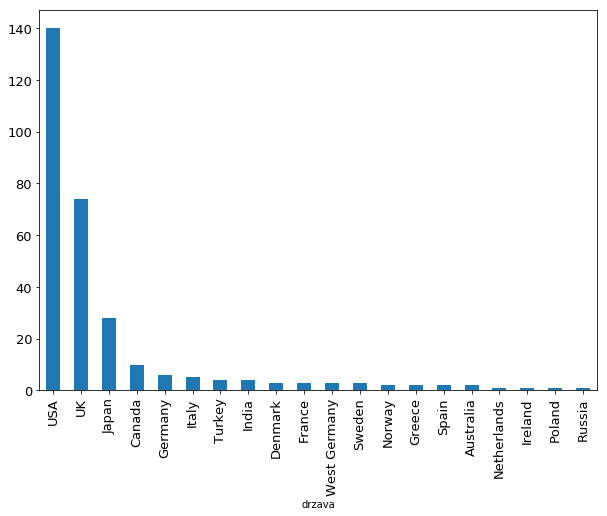

In [10]:
tabela1.groupby('drzava').size().sort_values(ascending = False).plot(kind='bar', figsize = (10, 7), fontsize = 13)

Največ jih je torej iz Združenih držav Amerike, Združenega kraljestva in Japonske. Kateri pa so tam najbolj pogosti žanri?

In [11]:
drzave[drzave['drzava'] == 'USA'].join(zanri).groupby('zanr').size().sort_values(ascending = False).head(10)

zanr
Drama        85
Comedy       54
Thriller     35
Crime        35
Action       29
Mystery      28
Sci-Fi       27
Adventure    24
Animation    21
Fantasy      18
dtype: int64

In [12]:
drzave[drzave['drzava'] == 'UK'].join(zanri).groupby('zanr').size().sort_values(ascending = False).head(10)

zanr
Drama          36
Comedy         31
Mystery        12
Crime          12
Documentary    10
Romance         9
War             7
Sci-Fi          7
History         6
Thriller        6
dtype: int64

In [13]:
drzave[drzave['drzava'] == 'Japan'].join(zanri).groupby('zanr').size().sort_values(ascending = False).head(10)

zanr
Animation    28
Action       24
Adventure    18
Fantasy      17
Drama        17
Thriller     14
Sci-Fi       14
Comedy       14
Horror        6
Romance       5
dtype: int64

Na japonskem so najbolj popularne animirane serije, kar ne preseneča, zanimivo pa je, da so pri ostalih dveh drame na prvem mestu.

Seveda pa sama količina serij še ne pomeni veliko - bolje je gledati povprečne ocene serij v teh državah:

In [14]:
drzave[
    (drzave['drzava'] == 'USA')|
    (drzave['drzava'] == 'UK')|
    (drzave['drzava'] == 'Japan')
].join(serije['ocena']).groupby('drzava').mean().sort_values(by = 'ocena', ascending = False)

,ocena
drzava,
UK,8.739189
USA,8.716429
Japan,8.689286


Vidimo torej, da čeprav je v ZDA več serij, so v povprečju slabše ocenjene kot v UK, Japonska pa ostaja na 3. mestu. Seveda pa moramo to statistiko jemati z nekaj rezerve, saj je zajetih podatkov premalo, da bi lahko natančno obravnavali take primerjave.

# Povezava ocene, dolžine in starosti serije

V nadaljevanju si oglejmo, kako povprečna dolžina epizode vpliva na oceno serije:

In [15]:
tabela2 = leta.join(serije[['ocena', 'dolzina']])
tabela2

,leto,ocena,dolzina
id,,,
43208,1951,8.4,30
43208,1952,8.4,30
43208,1953,8.4,30
43208,1954,8.4,30
43208,1955,8.4,30
43208,1956,8.4,30
43208,1957,8.4,30
...,...,...,...
5288312,2015,9.1,30


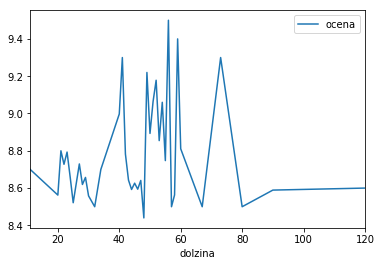

In [16]:
tabela2.drop('leto', axis=1).groupby('dolzina').mean().plot()

Zgleda, da so najbolje ocenjene serije z med 50 in 60 minutnimi epizodami. Kako je pa dolžina epizod odvisna od leta izida?

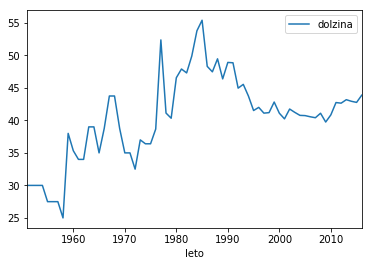

In [17]:
tabela2.drop('ocena', axis=1).groupby('leto').mean().plot()

In [18]:
tabela2.drop('ocena', axis=1)[(tabela2['leto'] >= 1990)].groupby('leto').mean().mean()

dolzina    42.491504
dtype: float64

Vidimo lahko, da je dolžina epizod čez leta 1951-1985 naraščala, to verjetno lahko pripišemo tehnološkemu razvoju v tem času, nato pa se je dolžina nekoliko zmanjšala in ustalila nekje okoli 42 minut, kar bi znala biti zlata sredina med ceno produkcije in gledanostjo.

Tu bi se bilo še smiselno vprašati, kako starost serije vpliva na njeno oceno:

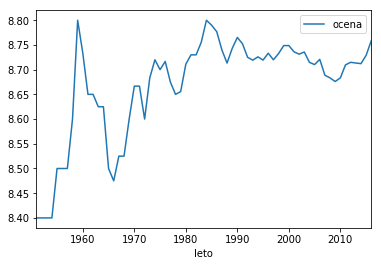

In [19]:
tabela2.drop('dolzina', axis=1).groupby('leto').mean().plot()

Ker te ocene precej nihajo, si raje oglejmo povprečje po posameznih desetletjih:

In [20]:
ocena_cas = tabela2.drop('dolzina', axis=1)
y = []
for x in range(1950, 2011, 10):
    y.append((x,ocena_cas[(ocena_cas['leto'] < x+10) & (ocena_cas['leto'] > x)].mean()['ocena']))
y

[(1950, 8.5230769230769212),
 (1960, 8.5771428571428565),
 (1970, 8.6740740740740723),
 (1980, 8.7499999999999947),
 (1990, 8.7307407407407389),
 (2000, 8.7080279232111675),
 (2010, 8.7237942122186212)]

Tu vidimo, da so povprečne ocene po desetletjih zelo podobne - vsako desetletje ima nekaj boljših in nekaj slabših serij. Zgleda, da starost nima bistvenega vpliva na oceno serije.

# Igralci

Za razliko od recimo filmov, bi za serije pričakovali, da se igralci bolj redko pojavljajo v večih serijah hkrati. Pa preverimo:

In [21]:
igralci.groupby('ime').size()[igralci.groupby('ime').size()>1].sort_values(ascending = False)

ime
Christopher Sabat       8
Stephen Fry             6
David Attenborough      5
Hugh Laurie             5
Colleen Clinkenbeard    5
Mike McFarland          5
Hiromi Tsuru            4
                       ..
Michelle Fairley        2
Michael Stuhlbarg       2
Michael Smiley          2
Michael McGrady         2
Michael Kelly           2
Michael Emerson         2
Aaron Douglas           2
dtype: int64

Opazimo, da ima kar nekaj igralcev več vlog. Da bomo imeli ta podatek na razpolago, dodajmo tabeli 'igralci' še en stolpec:

In [22]:
def st_vlog(ime):
    return len(igralci[igralci['ime'] == ime])

In [23]:
igralci1 = igralci.copy()
igralci1['stevilo_vlog'] = igralci1['ime'].apply(st_vlog)

In [24]:
igralci1

,id,id igralca,ime,vloga,stevilo_vlog
0,5491994,41003,David Attenborough,Himself - presenter,5
1,185906,342241,Scott Grimes,Donald G. Malarkey,1
2,185906,507073,Damian Lewis,Richard D. Winters,2
3,185906,515296,Ron Livingston,Lewis Nixon,1
4,185906,853169,Shane Taylor,Eugene G. Roe,1
5,185906,5531,Donnie Wahlberg,C. Carwood Lipton,1
6,185906,950186,Peter Youngblood Hills,Darrell C. (Shifty) Powers,1
...,...,...,...,...,...
3384,2126154,4813425,Autumn Smiles,Titch,1
3385,2126154,2772078,Ian Smith,Mr. Benson,1


In [25]:
igralci_v_vecih = len(igralci1[igralci1['stevilo_vlog'] > 1].groupby('ime'))
igralci_v_vecih

266

In [26]:
vsi_igralci = igralci.groupby('ime').size().count()
vsi_igralci

3056

In [27]:
igralci_v_vecih / vsi_igralci *100

8.7041884816753932

Kot vidimo, jih morda ni tako malo kot bi mislili, je pa vseeno takih le 8.7% vseh igralcev. Poglejmo še, ali je morda opazna razlika med uspešnostjo igralcev z eno oz. večimi vlogami:

In [28]:
a = igralci1.join(serije['ocena'], on='id')[
    igralci1['stevilo_vlog'] > 1
].groupby('ime').mean()['ocena'].mean()
a

8.7288471177944871

In [29]:
b= igralci1.join(serije['ocena'], on='id')[
    igralci1['stevilo_vlog'] == 1
].groupby('ime').mean()['ocena'].mean()
b

8.7093189964157709

In [30]:
a/b*100 -100

0.22422099117913774

V povprečju so ocene igralcev z večimi vlogami višje, ampak za praktično zanemarljiv delež.

Katero pa je najbolj pogosto ime igralcev v serijah?

In [41]:
def ime(ime_priimek):
    return ime_priimek.split(' ')[0]
imena = igralci['ime'].apply(ime).unique()
s = {}
for ime in imena:
    i=0
    for polno_ime in igralci['ime'].unique():
        if ime in polno_ime:
            i += 1
    s[ime] = i
max(s, key=s.get), s['Jo']

('Jo', 187)

In [43]:
s['Jo'] / vsi_igralci *100

6.1191099476439792

Najbolj pogosto je torej ime "Jo" in sicer jih je kar 187, kar je malo čez 6% vseh igralcev.

# Žanri

Za zaključek bomo pogledali še kako je z žanri serij. Nekaj o žanrih smo ugotovili že pri naslovu "Serije po državah", tu pa bomo to še nekoliko razširili. Prej smo si gledali le najbolj pogoste žanre v ZDA, UK in na Japonskem, kako je pa v splošnem?

In [47]:
drzave.join(zanri).groupby('zanr').size().sort_values(ascending=False)

zanr
Drama         176
Comedy        115
Thriller       65
Action         62
Crime          60
Mystery        59
Sci-Fi         54
             ... 
Talk-Show       5
Western         4
Game-Show       3
Musical         3
News            3
Reality-TV      1
Sport           1
dtype: int64

Kot smo videli pri ZDA in UK, so tudi na splošno najbolj pogoste drame in komedije. To ni presenetljivo, saj je večina serij iz teh dveh držav. Kakšne so pa ocene po žanrih?

In [55]:
ocene_zanrov = drzave.join(zanri).join(serije['ocena']).groupby('zanr').mean()['ocena'].sort_values(ascending=False)
ocene_zanrov

zanr
Documentary    9.080769
Talk-Show      8.860000
War            8.838889
History        8.804545
News           8.800000
Western        8.750000
Adventure      8.748000
                 ...   
Comedy         8.655652
Family         8.634783
Game-Show      8.633333
Biography      8.628571
Horror         8.581818
Music          8.560000
Musical        8.533333
Name: ocena, dtype: float64

In [63]:
'Drama' in ocene_zanrov.head(10)

False

In [64]:
'Comedy' in ocene_zanrov.head(10)

False

Vidimo, da čeprav je dram in komedij daleč največ, po ocenah ne pridejo niti med prvih 10 žanrov. Po eni strani razumljivo, saj če je več serij istega žanra, je težje držati visoko povprečje ocen, po drugi strani pa je zanimivo, da najbolj množične serije niso med najbolje ocenjenimi.

V nadaljevanju bomo obravnavali število glasov pri posamezni seriji za dovolj dober približek gledanosti. To seveda ni res, saj večina gledalcev ne poda ocene, bi se pa morala približno ohranjati vsaj razmerja, kar bo za namene naše analize dovolj dobro.

In [81]:
tabela3 = serije[['naslov', 'ocena', 'st_glasov']].join(zanri)
tabela3.sort_values('st_glasov', ascending=False)

,naslov,ocena,st_glasov,zanr
id,,,,
944947,Game of Thrones,9.5,1106304,Fantasy
944947,Game of Thrones,9.5,1106304,Romance
944947,Game of Thrones,9.5,1106304,Adventure
944947,Game of Thrones,9.5,1106304,Drama
903747,Breaking Bad,9.5,939633,Crime
903747,Breaking Bad,9.5,939633,Drama
903747,Breaking Bad,9.5,939633,Thriller
...,...,...,...,...
90509,The Return of Sherlock Holmes,8.9,5902,Crime


Če se kaj spoznate na popularne serije zadnjih let, potem vam bodo naslovi na vrhu verjetno znani. Poglejmo kako se medsebojno obnašata ocena in število glasov:

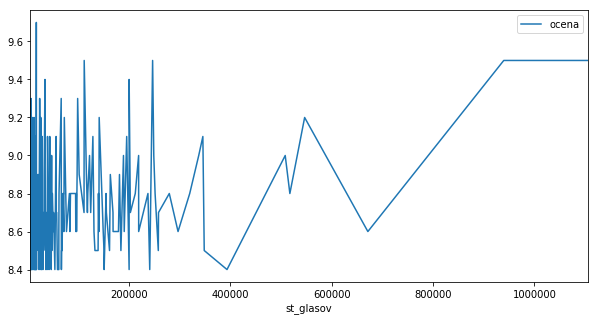

In [82]:
tabela3.groupby('st_glasov').mean().plot(figsize=(10,5))

Kot vidimo, zadeva precej oscilira, iz česar bomo sklepali, da neke bistvene povezave med oceno in gledanostjo ni. To je zanimivo dejstvo; imamo torej serije, ki so odlične, vendar jih malo ljudi gleda, in pa tudi serije, ki so slabe, vendar jih veliko ljudi gleda. Glede na to kaj se danes najde po televiziji, to niti ni tako presenetljivo.

Preverimo še gledanost po žanrih:

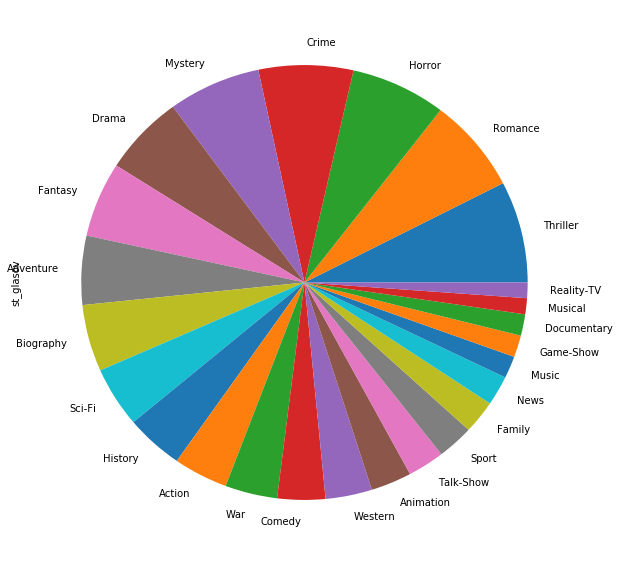

In [90]:
tabela3.groupby('zanr').mean()['st_glasov'].sort_values(ascending = False).plot(kind='pie', figsize = (10, 10))

Podatki torej kažejo na to, da so najbolj gledani trilerji, romance in grozljivke. Opazimo, da so drame in komedije spet opazno pod vrhom (komedije so celo v spodnji polovici). Torej količina serij določenega žanra nima tako velikega vpliva na gledanost.